## EDA

Datos de entrenamiento:  (60000, 28, 28) (60000,)
Datos de prueba:  (10000, 28, 28) (10000,)
Dígitos de entrenamiento:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Dígitos de prueba:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


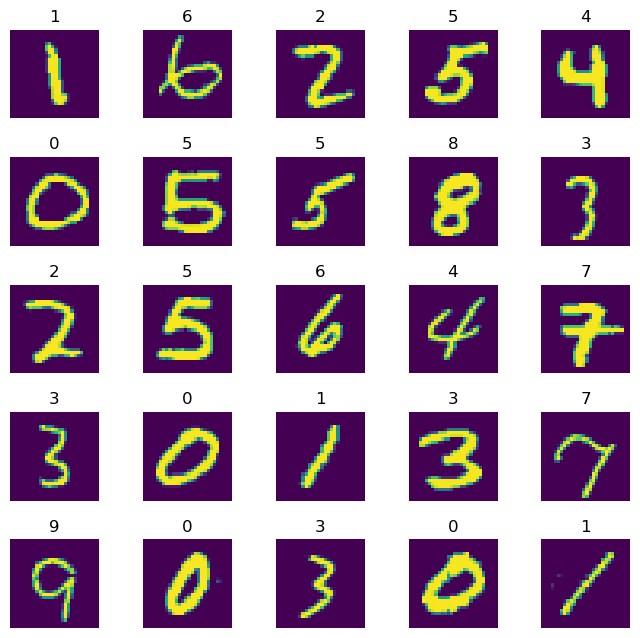

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Imprimir la forma de los datos de entrenamiento y prueba
print('Datos de entrenamiento: ', x_train.shape, y_train.shape)
print('Datos de prueba: ', x_test.shape, y_test.shape)

# Verificar el equilibrio de las etiquetas de los dígitos
unique, counts = np.unique(y_train, return_counts=True)
print('Dígitos de entrenamiento: ', dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print('Dígitos de prueba: ', dict(zip(unique, counts)))

# Visualizar algunos ejemplos de los dígitos
fig, axes = plt.subplots(5, 5, figsize=(8,8))
axes = axes.ravel()

for i in np.arange(0, 25):
    index = np.random.randint(0, len(x_train))
    axes[i].imshow(x_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])
    plt.subplots_adjust(wspace=0.5)

## Practice Problems 8

1. Build and train a keras sequential model to classify digits form the mnist dataset. The model
must have a hidden dense layer of 128 neurons with a relu activation function

In [6]:
# Importar librerías necesarias
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import numpy as np

# Cargar los datos de MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesar los datos

# Convertir las imágenes de entrenamiento y prueba a vectores de una dimensión
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Convertir los datos a tipo float32 y normalizarlos para que estén en el rango de 0 a 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convertir las etiquetas de los dígitos a one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)



In [2]:

# Crear el modelo secuencial
model = Sequential()

# Agregar una capa densa oculta de 128 neuronas con una función de activación relu
model.add(Dense(128, activation='relu', input_shape=(784,)))

# Agregar una capa de salida con 10 neuronas y una función de activación softmax para clasificar los dígitos
model.add(Dense(10, activation='softmax'))

# Compilar el modelo con la pérdida de entropía cruzada categórica y el optimizador Adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba
model.fit(x_train, y_train,
          batch_size=128,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluar el modelo con los datos de prueba
score = model.evaluate(x_test, y_test, verbose=0)

# Imprimir la pérdida y precisión del modelo en los datos de prueba
print('Test loss:', score[0])
print('Test accuracy:', score[1])


2023-04-15 16:04:59.611969: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 16:04:59.613066: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3611 - accuracy: 0.9004 - val_loss: 0.1962 - val_accuracy: 0.9391
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1630 - accuracy: 0.9534 - val_loss: 0.1371 - val_accuracy: 0.9591
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1157 - accuracy: 0.9669 - val_loss: 0.1106 - val_accuracy: 0.9655
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0903 - accuracy: 0.9738 - val_loss: 0.0955 - val_accuracy: 0.9724
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0720 - accuracy: 0.9791 - val_loss: 0.0903 - val_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0598 - accuracy: 0.9829 - val_loss: 0.0814 - val_accuracy: 0.9753
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0506 - accuracy: 0.9858 - val_loss: 0.0790 - val_accuracy: 0.9774
Epoc

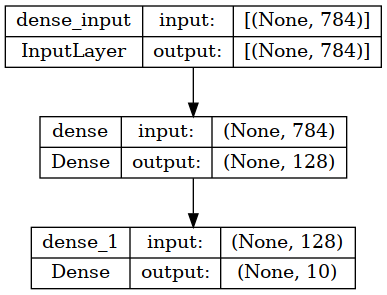

In [13]:
# Graficar el modelo
from keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)

2. Now build and train a keras functional model for the same problem. The model must have a hidden dense layer of 128 neurons with an activation function defined by the following function:
$$
\text { activation }(x)= \begin{cases}0 & \text { if } x<0 \\ \sin \left(x-\frac{\pi}{2}\right)+1 & \text { if } 0 \leq x \leq \frac{\pi}{2} \\ x-\frac{\pi}{2}+1 & \text { otherwise }\end{cases}
$$

In [7]:
# Crear la capa de activación personalizada
def my_activation(x):
    # Definir una condición booleana que sea verdadera si x es menor que 0
    condition = keras.backend.less(x, 0)
    
    # Calcular la activación sin para los valores de x entre 0 y pi/2
    sin_activation = keras.backend.sin(x - np.pi / 2) + 1
    
    # Calcular la activación lineal para los valores de x mayores que pi/2
    linear_activation = x - np.pi / 2 + 1
    
    # Utilizar la función switch de Keras para aplicar la activación sin a los valores entre 0 y pi/2
    # y la activación lineal a los valores mayores que pi/2. Los valores negativos se establecen a cero.
    return keras.backend.switch(condition, keras.backend.zeros_like(x), keras.backend.switch(keras.backend.less_equal(x, np.pi / 2), sin_activation, linear_activation))

In [8]:
# Crear el modelo secuencial
model = Sequential()

# Agregar una capa densa oculta de 128 neuronas con una función de activación relu
model.add(Dense(128, activation=my_activation, input_shape=(784,)))

# Agregar una capa de salida con 10 neuronas y una función de activación softmax para clasificar los dígitos
model.add(Dense(10, activation='softmax'))

# Compilar el modelo con la pérdida de entropía cruzada categórica y el optimizador Adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba
model.fit(x_train, y_train,
          batch_size=128,
          epochs=7,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluar el modelo con los datos de prueba
score = model.evaluate(x_test, y_test, verbose=0)

# Imprimir la pérdida y precisión del modelo en los datos de prueba
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/7
469/469 [==============================] - 8s 16ms/step - loss: 0.3753 - accuracy: 0.8971 - val_loss: 0.1923 - val_accuracy: 0.9464
Epoch 2/7
469/469 [==============================] - 5s 10ms/step - loss: 0.1647 - accuracy: 0.9537 - val_loss: 0.1392 - val_accuracy: 0.9593
Epoch 3/7
469/469 [==============================] - 5s 11ms/step - loss: 0.1201 - accuracy: 0.9659 - val_loss: 0.1155 - val_accuracy: 0.9664
Epoch 4/7
469/469 [==============================] - 6s 13ms/step - loss: 0.0947 - accuracy: 0.9730 - val_loss: 0.1032 - val_accuracy: 0.9683
Epoch 5/7
469/469 [==============================] - 4s 8ms/step - loss: 0.0776 - accuracy: 0.9776 - val_loss: 0.0911 - val_accuracy: 0.9728
Epoch 6/7
469/469 [==============================] - 4s 8ms/step - loss: 0.0640 - accuracy: 0.9818 - val_loss: 0.0869 - val_accuracy: 0.9750
Epoch 7/7
469/469 [==============================] - 4s 8ms/step - loss: 0.0532 - accuracy: 0.9845 - val_loss: 0.0804 - val_accuracy: 0.9769
Test loss

3. Repeat the previous questions but now using PyTorch

In [13]:
import numpy as np
from torchvision import datasets, transforms

train_dataset = datasets.MNIST('./data', train=True, download=True, transform=None)
train_data = train_dataset.data.numpy()

mean = np.mean(train_data / 255)  # Normalizar los valores de los píxeles al rango de 0 a 1
std = np.std(train_data / 255)
print('Mean:', mean)
print('Std:', std)

Mean: 0.1306604762738429
Std: 0.3081078038564622


In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Preprocesar los datos de MNIST
# Definir una transformación que convierte las imágenes a tensores y las normaliza
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Cargar los datos de entrenamiento y prueba con la transformación definida
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

# Crear iteradores de lotes para los datos de entrenamiento y prueba
# Los datos se agrupan en lotes de 128 imágenes y se mezclan aleatoriamente los lotes de entrenamiento
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)


In [ ]:
# Definir la arquitectura de la red neuronal
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Definir la primera capa completamente conectada con 784 entradas y 128 salidas
        self.fc1 = nn.Linear(784, 128)
        # Definir la segunda capa completamente conectada con 128 entradas y 10 salidas
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Aplanar la entrada x para que tenga forma (batch_size, 784)
        x = x.view(-1, 784)
        # Aplicar una función de activación ReLU a la salida de la primera capa
        x = F.relu(self.fc1(x))
        # Aplicar una función de activación softmax a la salida de la segunda capa
        x = F.softmax(self.fc2(x), dim=1)
        return x


In [ ]:
# Crear una instancia del modelo y definir la función de pérdida y el optimizador
model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
for epoch in range(7):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reiniciar los gradientes acumulados en el optimizador
        optimizer.zero_grad()
        # Pasar los datos por la red neuronal
        output = model(data)
        # Calcular la función de pérdida entre la salida y la etiqueta
        loss = loss_fn(output, target)
        # Calcular los gradientes de la función de pérdida
        loss.backward()
        # Actualizar los pesos de la red neuronal utilizando el optimizador
        optimizer.step()

        # Imprimir la pérdida en intervalos regulares
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Evaluar el modelo
correct = 0  # Contador de respuestas correctas
total = 0  # Contador de respuestas totales
with torch.no_grad():
    for data, target in test_loader:
        # Pasar los datos por la red neuronal
        output = model(data)
        # Obtener las etiquetas predichas como el índice de la neurona con la salida máxima
        _, predicted = torch.max(output.data, 1)
        # Actualizar los contadores de respuestas correctas y totales
        total += target.size(0)
        correct += (predicted == target).sum().item()


print('Test Accuracy: {:.2f}%'.format(100. * correct / total))


In [18]:
# Definir la función de activación personalizada
def my_activation(x):
    # Definir la condición para la activación
    condition = torch.lt(x, 0)
    # Definir la activación sinusoidal para x en el rango [0, pi/2]
    sin_activation = torch.sin(x - np.pi / 2) + 1
    # Definir la activación lineal para x fuera del rango [0, pi/2]
    linear_activation = x - np.pi / 2 + 1
    # Aplicar la función de activación según la condición
    return torch.where(condition, torch.zeros_like(x), torch.where(torch.le(x, np.pi / 2), sin_activation, linear_activation))


In [20]:
# Definir la arquitectura del modelo
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = my_activation(self.fc1(x))
        x = F.softmax(self.fc2(x), dim=1)
        return x


In [21]:
# Crear una instancia del modelo y definir la función de pérdida y el optimizador
model = Net()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
for epoch in range(7):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Reiniciar los gradientes acumulados en el optimizador
        optimizer.zero_grad()
        # Pasar los datos por la red neuronal
        output = model(data)
        # Calcular la función de pérdida entre la salida y la etiqueta
        loss = loss_fn(output, target)
        # Calcular los gradientes de la función de pérdida
        loss.backward()
        # Actualizar los pesos de la red neuronal utilizando el optimizador
        optimizer.step()

        # Imprimir la pérdida en intervalos regulares
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

# Evaluar el modelo
correct = 0  # Contador de respuestas correctas
total = 0  # Contador de respuestas totales
with torch.no_grad():
    for data, target in test_loader:
        # Pasar los datos por la red neuronal
        output = model(data)
        # Obtener las etiquetas predichas como el índice de la neurona con la salida máxima
        _, predicted = torch.max(output.data, 1)
        # Actualizar los contadores de respuestas correctas y totales
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Test Accuracy: {:.2f}%'.format(100. * correct / total))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.303801
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1.595620
Train Epoch: 0 [25600/60000 (43%)]	Loss: 1.535076
Train Epoch: 0 [38400/60000 (64%)]	Loss: 1.513203
Train Epoch: 0 [51200/60000 (85%)]	Loss: 1.566635
Train Epoch: 1 [0/60000 (0%)]	Loss: 1.550010
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.514860
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.526469
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.554626
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.501925
Train Epoch: 2 [0/60000 (0%)]	Loss: 1.529548
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.491525
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.521741
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.489732
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.498947
Train Epoch: 3 [0/60000 (0%)]	Loss: 1.478564
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.516168
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.510204
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.497696
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.501955
Train Epoch: 4 [0/60